<a href="https://colab.research.google.com/github/jainaryan/eda-class/blob/main/EDA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from plotnine import *



In [ ]:
# Read the dataset
data = pd.read_csv("//content//KosteckiDillon.csv")

# Check if any NA exists
na_exists = data.isnull().values.any()
print(f"Any missing values? {na_exists}")

# Find the total number of NA in the dataset
total_na = data.isnull().sum().sum()
print(f"Total number of missing values: {total_na}")

# Display the missing values per column for each observation
na_per_column = data.isnull().sum()
print("Missing values per column:")
print(na_per_column)

# Perform row-wise deletion
data_cleaned = data.dropna()

# Display the number of rows and columns in the dataset
print(f"Rows: {data_cleaned.shape[0]}, Columns: {data_cleaned.shape[1]}")


Any missing values? False
Total number of missing values: 0
Missing values per column:
rownames      0
id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64
Rows: 4152, Columns: 10


In [ ]:
# Data deduplication
data_deduplicated = data.drop_duplicates()
print(data_deduplicated)

      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]


In [ ]:

# Display the header or attribute names from the dataset
print("Attribute names:")
print(list(data.columns))
print("")
# Display the structure of the dataset
print("Dataset structure:")
print(data.info())
print("")
# View the first and last 3 rows of the dataset
print("First 3 rows:")
print(data.head(3))
print("Last 3 rows:")
print(data.tail(3))

Attribute names:
['rownames', 'id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache', 'sex']

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4152 non-null   int64  
 1   id          4152 non-null   int64  
 2   time        4152 non-null   int64  
 3   dos         4152 non-null   int64  
 4   hatype      4152 non-null   object 
 5   age         4152 non-null   int64  
 6   airq        4152 non-null   float64
 7   medication  4152 non-null   object 
 8   headache    4152 non-null   object 
 9   sex         4152 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 324.5+ KB
None

First 3 rows:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30  

In [ ]:
# Reshaping with hierarchical indexing
# Assume 'id' and 'sex' are to be used as hierarchical index
data_hierarchical = data.set_index(['id', 'sex'])
print(data_hierarchical)


            rownames  time   dos hatype  age  airq  medication headache
id  sex                                                                
1   female         1   -11   753   Aura   30   9.0  continuing      yes
    female         2   -10   754   Aura   30   7.0  continuing      yes
    female         3    -9   755   Aura   30  10.0  continuing      yes
    female         4    -8   756   Aura   30  13.0  continuing      yes
    female         5    -7   757   Aura   30  18.0  continuing      yes
...              ...   ...   ...    ...  ...   ...         ...      ...
133 male        4148    44  1232   Aura   26  20.0  continuing      yes
    male        4149    45  1233   Aura   26  27.0  continuing       no
    male        4150    46  1234   Aura   26  28.0  continuing       no
    male        4151    47  1235   Aura   26  33.0  continuing       no
    male        4152    48  1236   Aura   26  25.0  continuing      yes

[4152 rows x 8 columns]


In [ ]:

# Replacing 'yes' with 1 and 'no' with 0 in the 'headache' column
data['headache'] = data['headache'].replace({'yes': 1, 'no': 0})
print(data)


      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25.0  continuing         1   

         sex  
0     female  
1     female  
2     female  
3     female  
4     female  
...      

<ipython-input-6-3d221fe60f67>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [ ]:
# Filling missing values with the mean of the column 'age'
data_filled_na = data.fillna(data['age'].mean())
print(data_filled_na)


      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25.0  continuing         1   

         sex  
0     female  
1     female  
2     female  
3     female  
4     female  
...      

In [ ]:
# Discretization and binning of 'age' column
bins = [0, 20, 30, 40, 50, 60]  # Define the bin ranges
labels = ['0-20', '20-30', '30-40', '40-50', '50-60']  # Define bin labels

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
print(data[['age', 'age_group']])


      age age_group
0      30     20-30
1      30     20-30
2      30     20-30
3      30     20-30
4      30     20-30
...   ...       ...
4147   26     20-30
4148   26     20-30
4149   26     20-30
4150   26     20-30
4151   26     20-30

[4152 rows x 2 columns]


In [ ]:
# Outlier detection and filtering
# Using the IQR (Interquartile Range) method for 'age' column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall outside 1.5*IQR range
outliers = data[(data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

# Removing outliers from the dataset
data_no_outliers = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]
print(data_no_outliers)


Outliers:
Empty DataFrame
Columns: [rownames, id, time, dos, hatype, age, airq, medication, headache, sex, age_group]
Index: []
      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25

In [ ]:

# Data Cleaning - Find out the number of values that are not numeric in the dataframe
non_numeric_counts = data.applymap(lambda x: not isinstance(x, (int, float))).sum().sum()
print(f"Number of non-numeric values: {non_numeric_counts}")

# Compute the measure of central tendency of the 'age' column
mean_age = data['age'].mean()
median_age = data['age'].median()
mode_age = data['age'].mode()[0]
print(f"Mean age: {mean_age}, Median age: {median_age}, Mode age: {mode_age}")

# Compute the measure of dispersion of the 'age' column (Standard Deviation, Variance)
std_age = data['age'].std()
var_age = data['age'].var()
print(f"Standard Deviation of age: {std_age}, Variance of age: {var_age}")

# Compute the quartile ranges and IQR of the 'age' column
q1_age = data['age'].quantile(0.25)
q3_age = data['age'].quantile(0.75)
iqr_age = q3_age - q1_age
print(f"Q1 (25th percentile): {q1_age}, Q3 (75th percentile): {q3_age}, IQR: {iqr_age}")


Number of non-numeric values: 16400
Mean age: 42.363921001926784, Median age: 44.0, Mode age: 46
Standard Deviation of age: 11.201243987490118, Variance of age: 125.4678668672835
Q1 (25th percentile): 33.0, Q3 (75th percentile): 50.0, IQR: 17.0


<ipython-input-10-9f4e0681d488>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


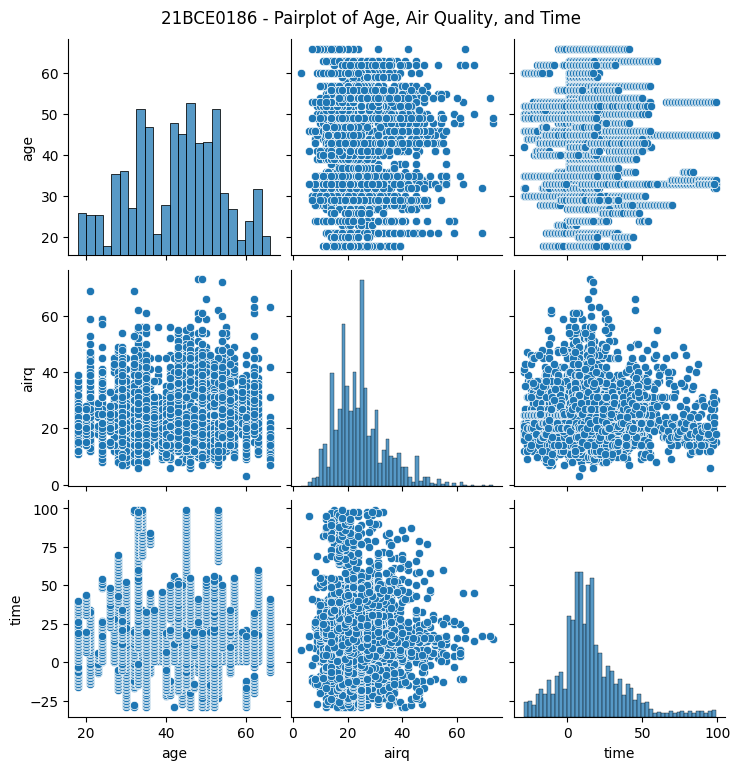

In [ ]:
import seaborn as sns

# Matrix scatter plot / Pairplot for selected numeric columns
sns.pairplot(data[['age', 'airq', 'time']])
plt.suptitle('21BCE0186 - Pairplot of Age, Air Quality, and Time', y=1.02)
plt.show()


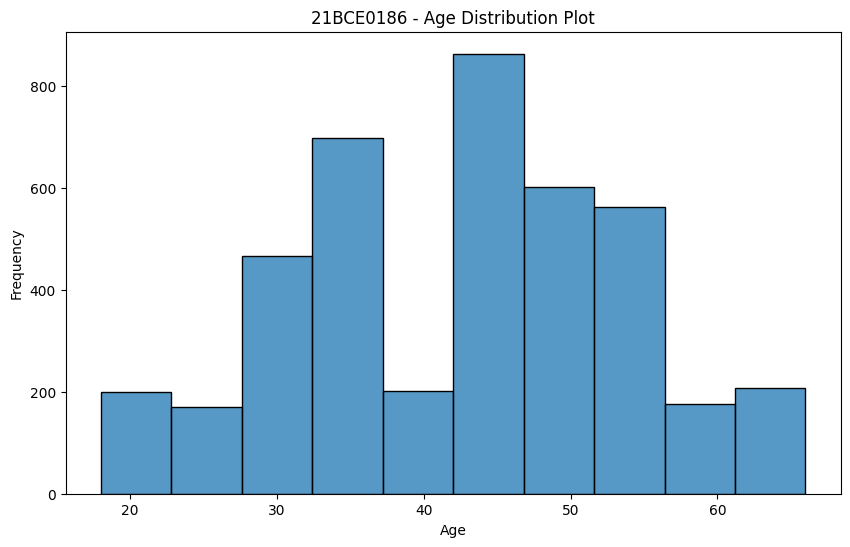

In [ ]:
# Distribution plot: histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=False, bins=10)
plt.title('21BCE0186 - Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

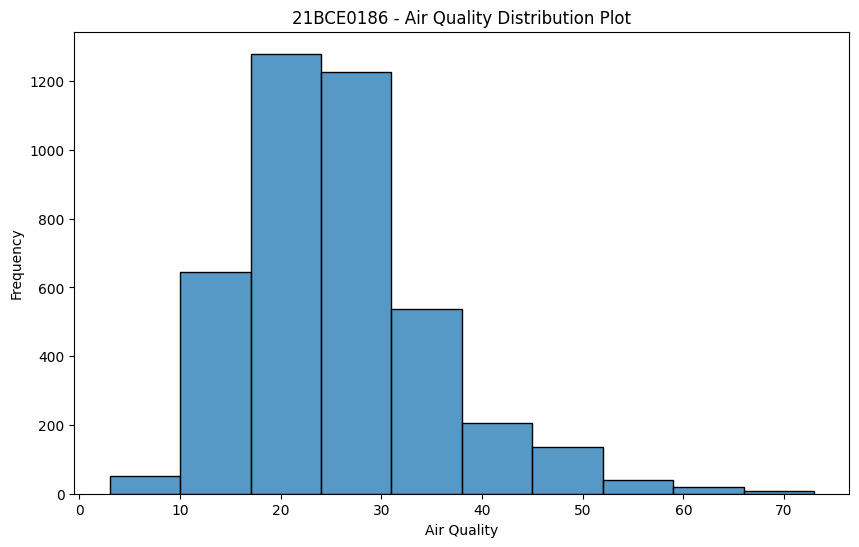

In [ ]:
# Distribution plot histogram for 'airq'
plt.figure(figsize=(10, 6))
sns.histplot(data['airq'], kde=False, bins=10)
plt.title('21BCE0186 - Air Quality Distribution Plot')
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.show()

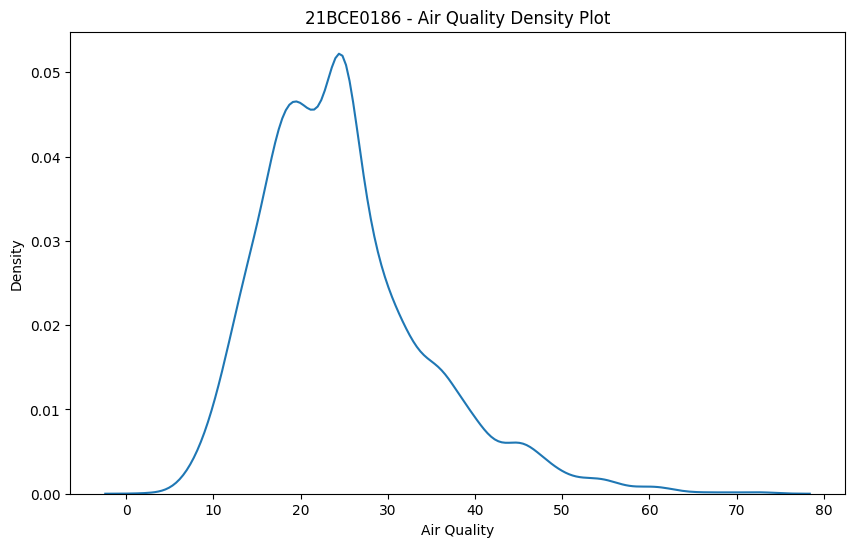

In [ ]:
# Distribution plot density for 'airq'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['airq'])
plt.title('21BCE0186 - Air Quality Density Plot')
plt.xlabel('Air Quality')
plt.ylabel('Density')
plt.show()

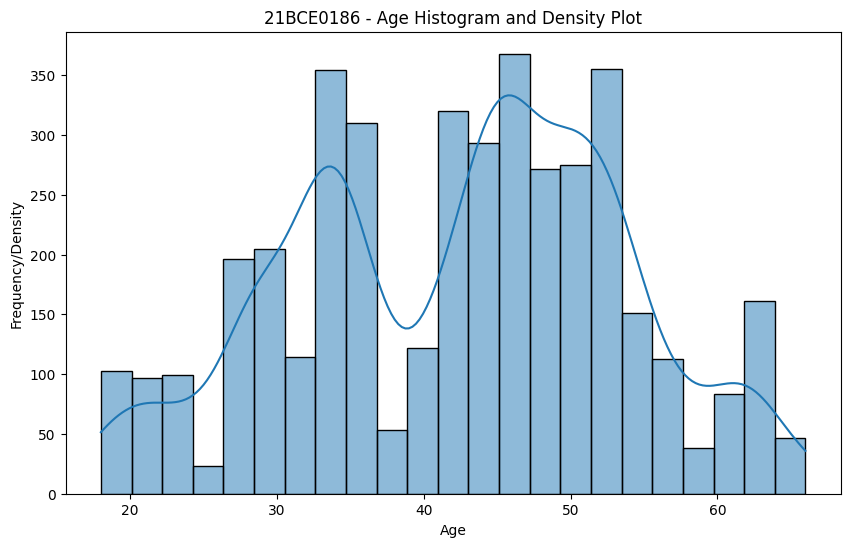

In [ ]:
# Distribution plot hist and density for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('21BCE0186 - Age Histogram and Density Plot')
plt.xlabel('Age')
plt.ylabel('Frequency/Density')
plt.show()


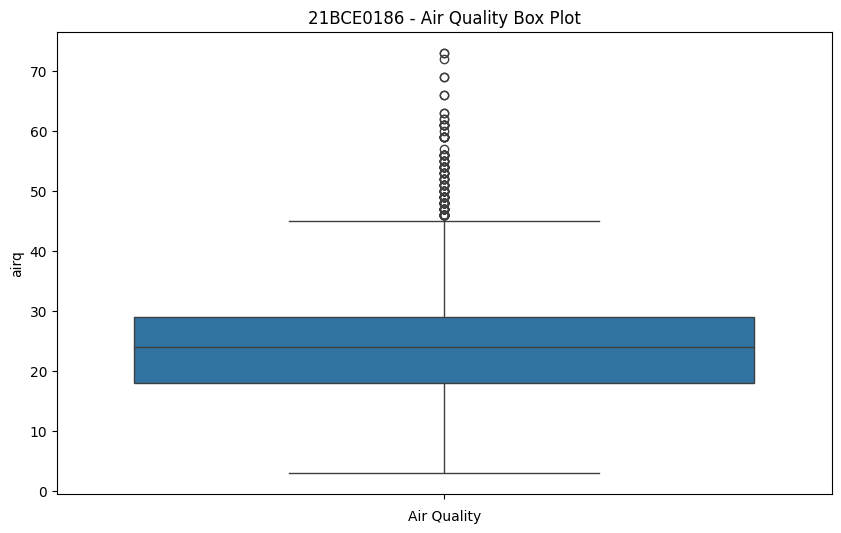

In [ ]:
# Box plot for column 'airq'
plt.figure(figsize=(10, 6))
sns.boxplot(data['airq'])
plt.title('21BCE0186 - Air Quality Box Plot')
plt.xlabel('Air Quality')
plt.show()


<Figure size 1000x600 with 0 Axes>

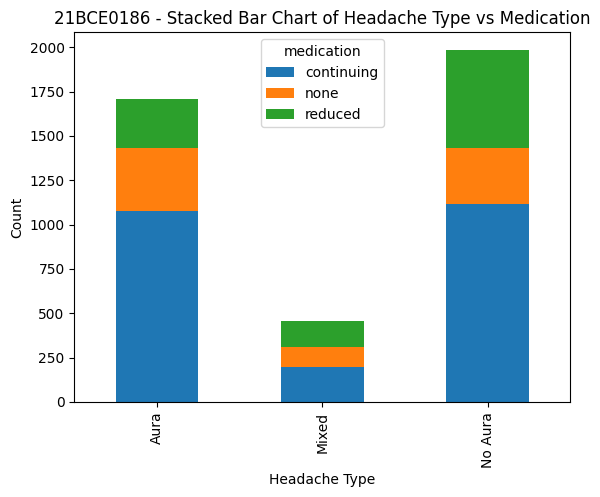

In [ ]:
# Stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(data['hatype'], data['medication'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.title('21BCE0186 - Stacked Bar Chart of Headache Type vs Medication')
plt.show()


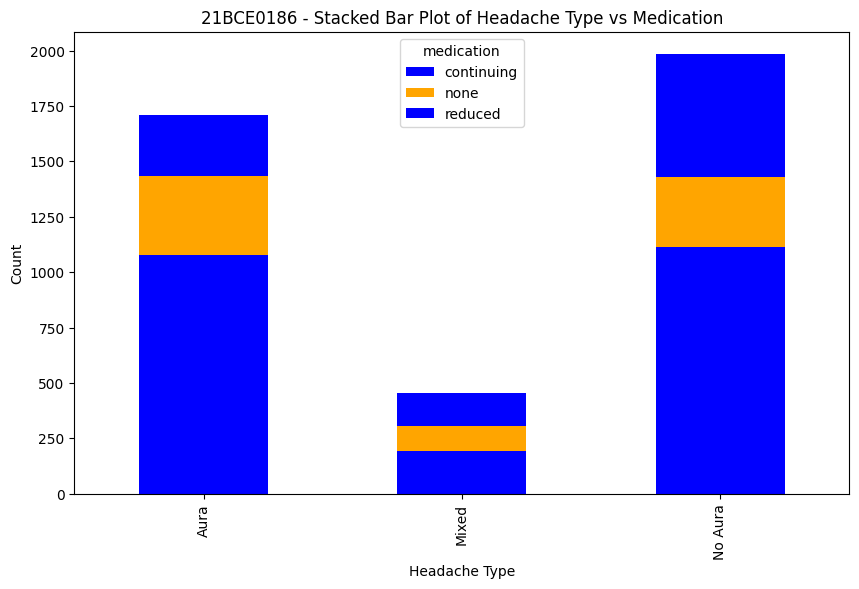

In [ ]:
# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10,6))
plt.title('21BCE0186 - Stacked Bar Plot of Headache Type vs Medication')
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.show()


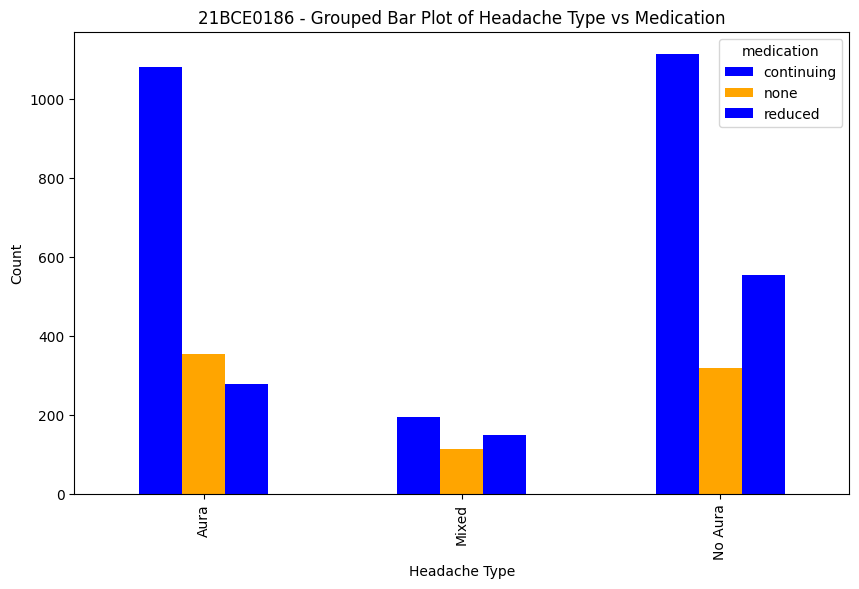

In [ ]:
# Grouped Bar Plot (side-by-side)
cross_tab.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(10,6))
plt.title('21BCE0186 - Grouped Bar Plot of Headache Type vs Medication')
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.show()


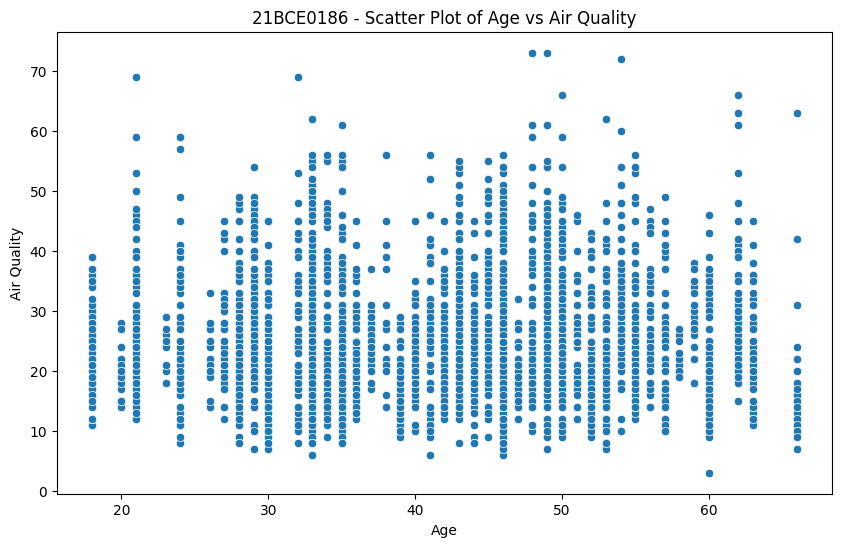

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='airq', data=data)
plt.title('21BCE0186 - Scatter Plot of Age vs Air Quality')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.show()


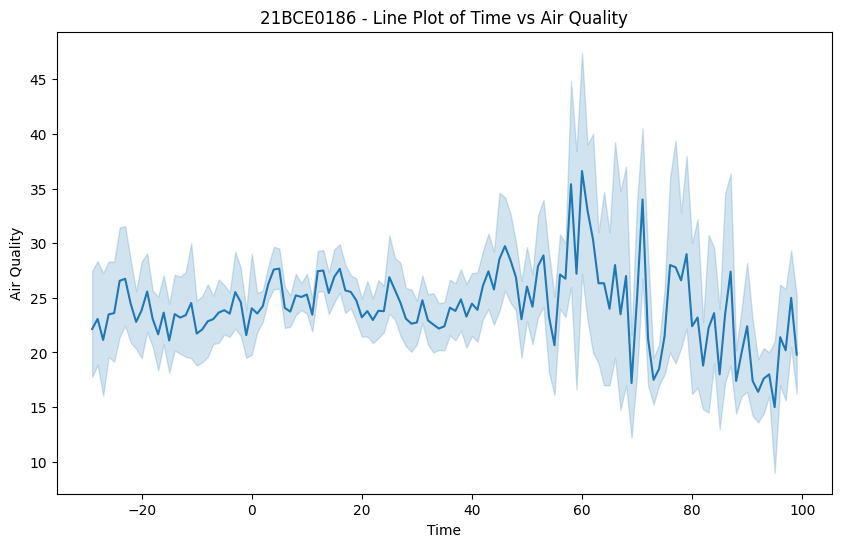

In [ ]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='airq', data=data)
plt.title('21BCE0186 - Line Plot of Time vs Air Quality')
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.show()


In [ ]:

# Calculate the correlation between the numeric columns using only numeric columns

numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

print("Correlation matrix (numeric columns only):")
print(correlation_matrix)


Correlation matrix (numeric columns only):
          rownames        id      time       dos       age      airq  headache
rownames  1.000000  0.999403 -0.131084  0.971490  0.054772 -0.103562 -0.019665
id        0.999403  1.000000 -0.137080  0.971239  0.057145 -0.102202 -0.019063
time     -0.131084 -0.137080  1.000000 -0.085977 -0.055781 -0.002529 -0.038022
dos       0.971490  0.971239 -0.085977  1.000000  0.021148 -0.129934 -0.005127
age       0.054772  0.057145 -0.055781  0.021148  1.000000 -0.009163 -0.058954
airq     -0.103562 -0.102202 -0.002529 -0.129934 -0.009163  1.000000  0.014357
headache -0.019665 -0.019063 -0.038022 -0.005127 -0.058954  0.014357  1.000000


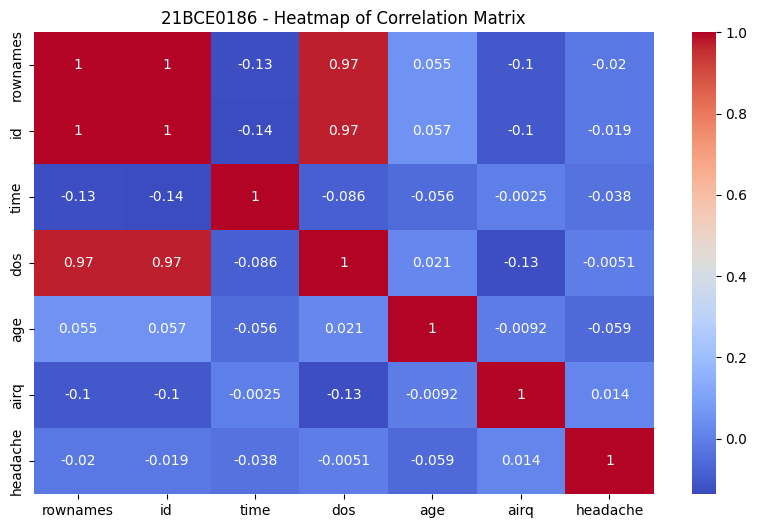

In [ ]:
# Heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('21BCE0186 - Heatmap of Correlation Matrix')
plt.show()


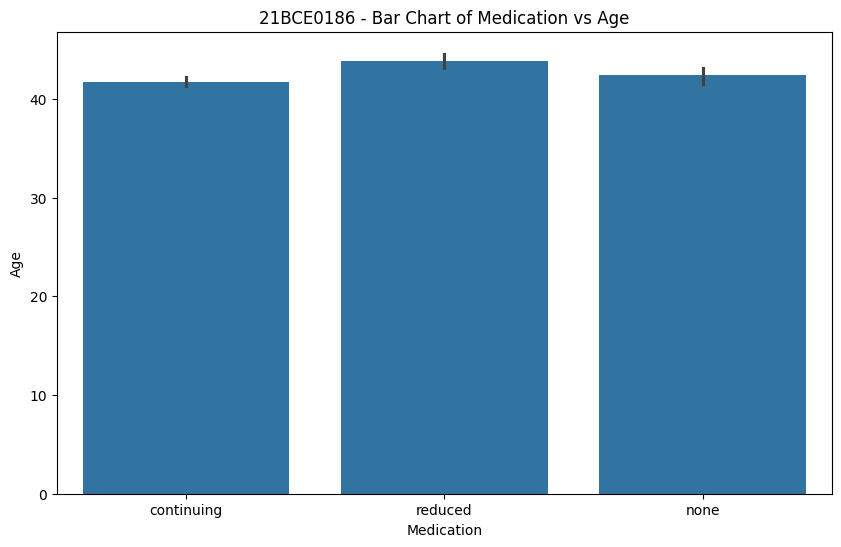

In [ ]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='medication', y='age', data=data)
plt.title('21BCE0186 - Bar Chart of Medication vs Age')
plt.xlabel('Medication')
plt.ylabel('Age')
plt.show()


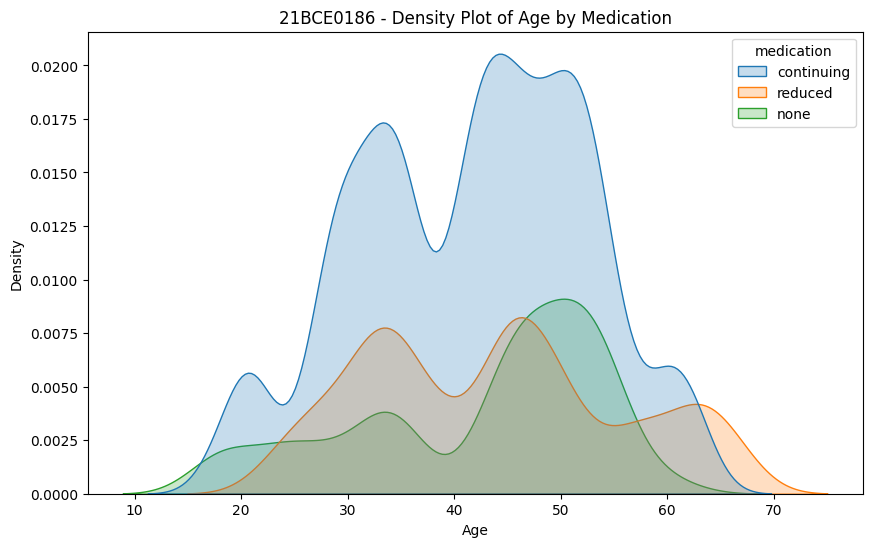

In [ ]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='age', hue='medication', fill=True)
plt.title('21BCE0186 - Density Plot of Age by Medication')
plt.xlabel('Age')
plt.show()


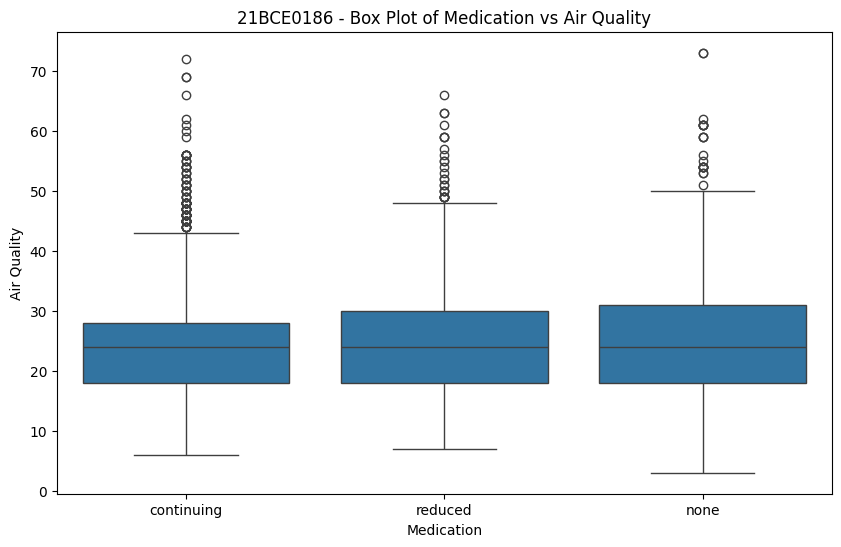

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Box Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


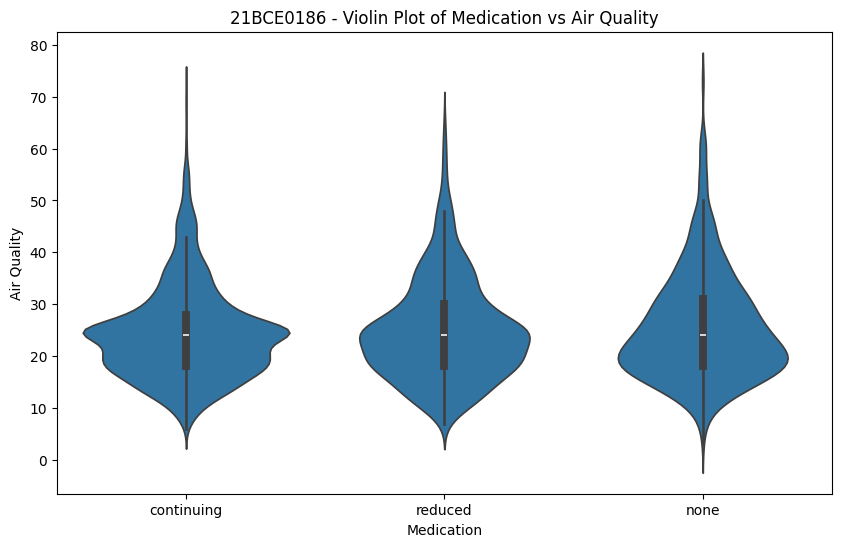

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Violin Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


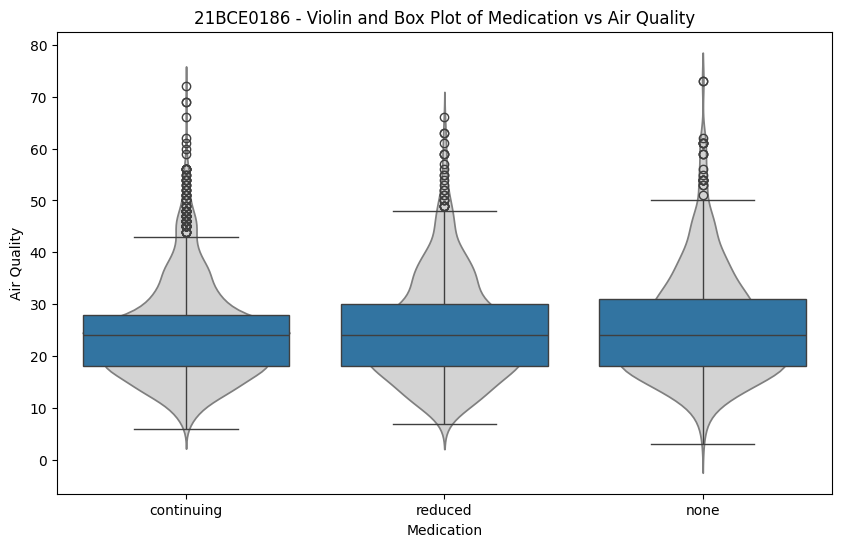

In [ ]:
# Violin and Boxplot Overlay
plt.figure(figsize=(10, 6))
sns.violinplot(x='medication', y='airq', data=data, inner=None, color='lightgrey')
sns.boxplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Violin and Box Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


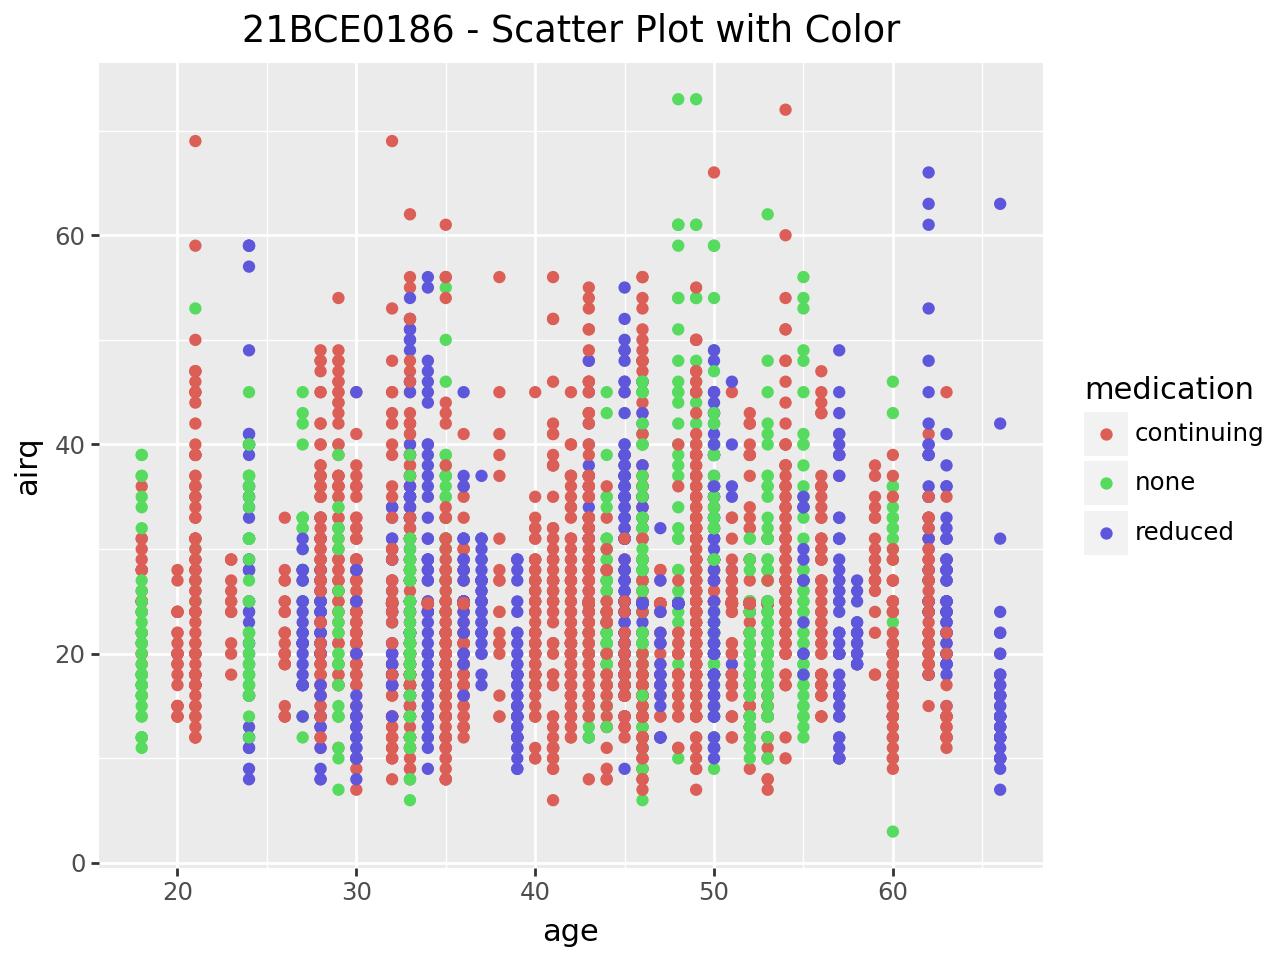

In [ ]:
# Scatter plot with color as third variable
(ggplot(data, aes(x='age', y='airq', color='medication'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color'))


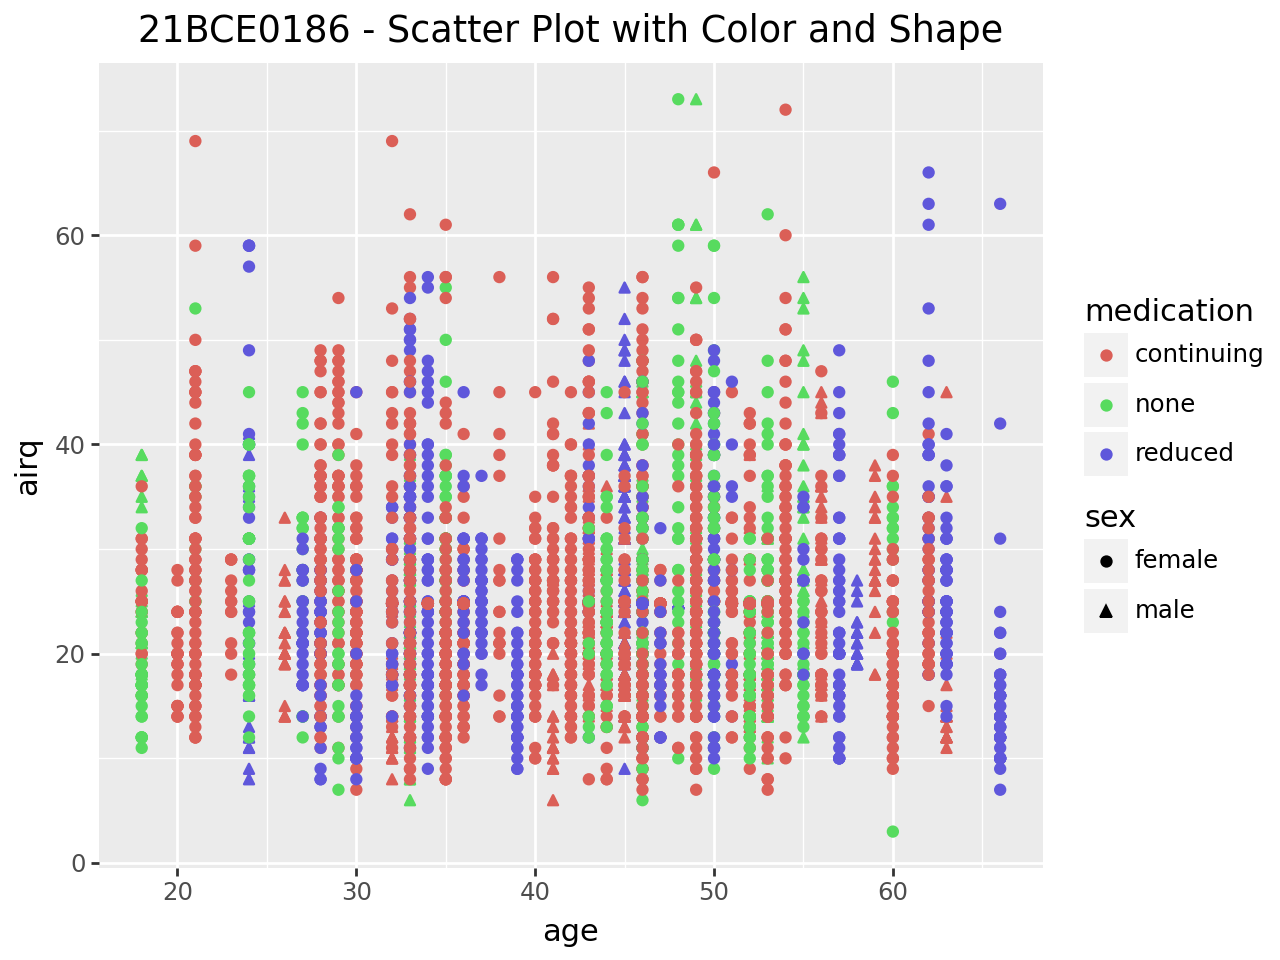

In [ ]:
# Scatter plot with color and shape
(ggplot(data, aes(x='age', y='airq', color='medication', shape='sex'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color and Shape'))


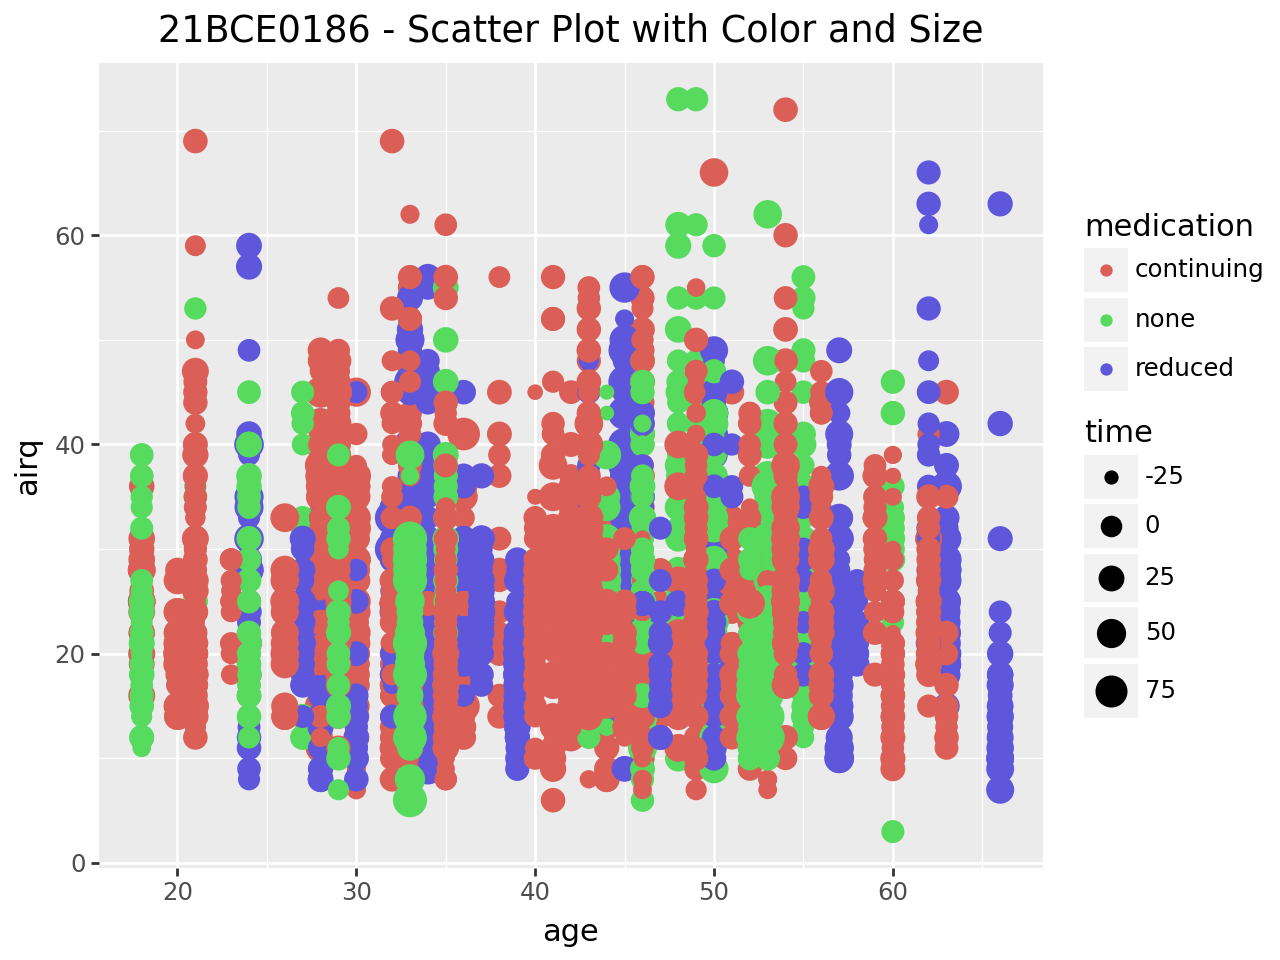

In [ ]:
# Scatter plot with color and size
(ggplot(data, aes(x='age', y='airq', color='medication', size='time'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color and Size'))


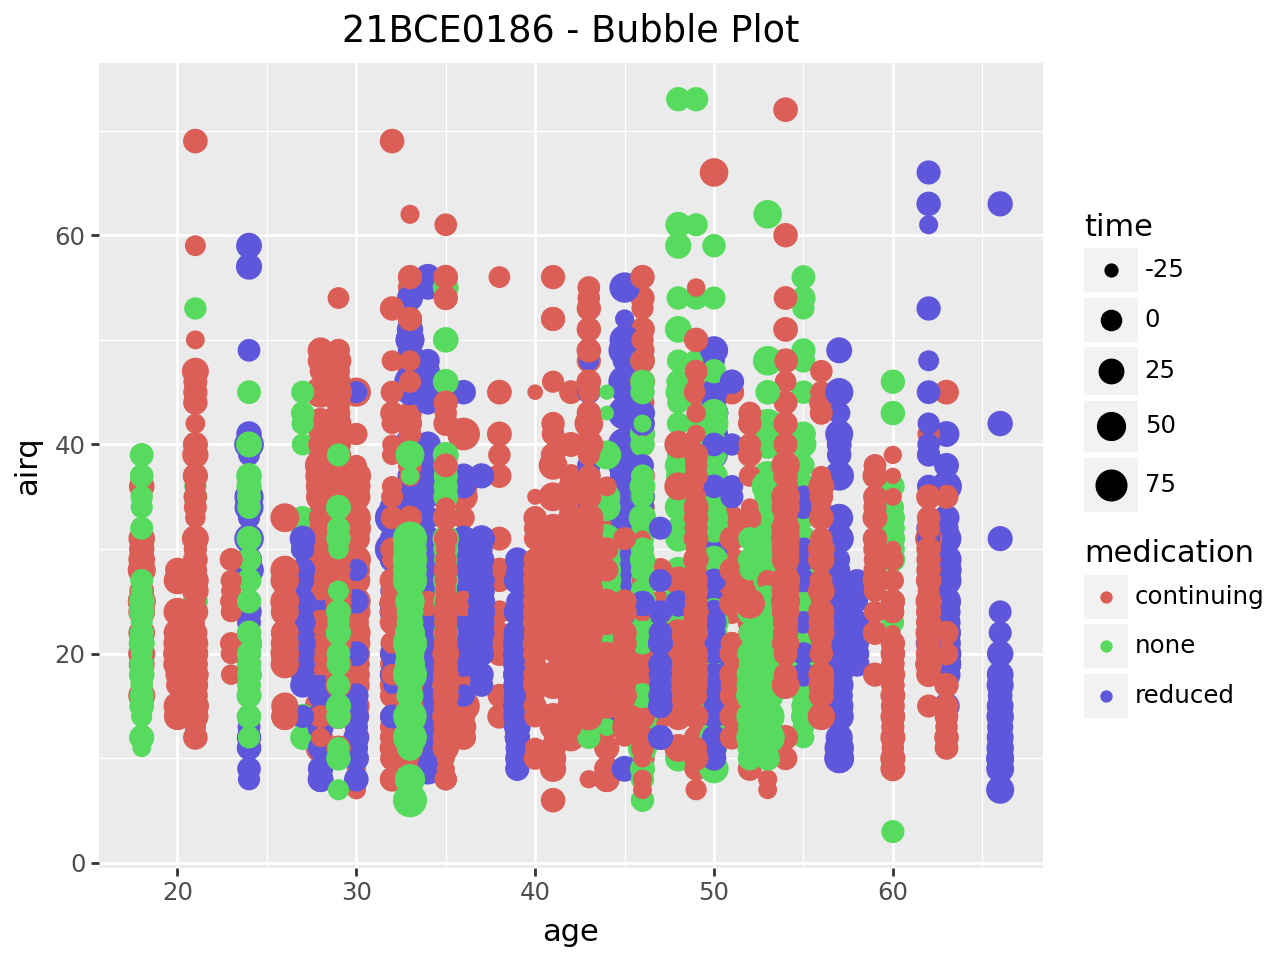

In [ ]:
# Bubble plot with size, color
(ggplot(data, aes(x='age', y='airq', color='medication'))
 + geom_point(aes(size='time'))
 + ggtitle('21BCE0186 - Bubble Plot'))


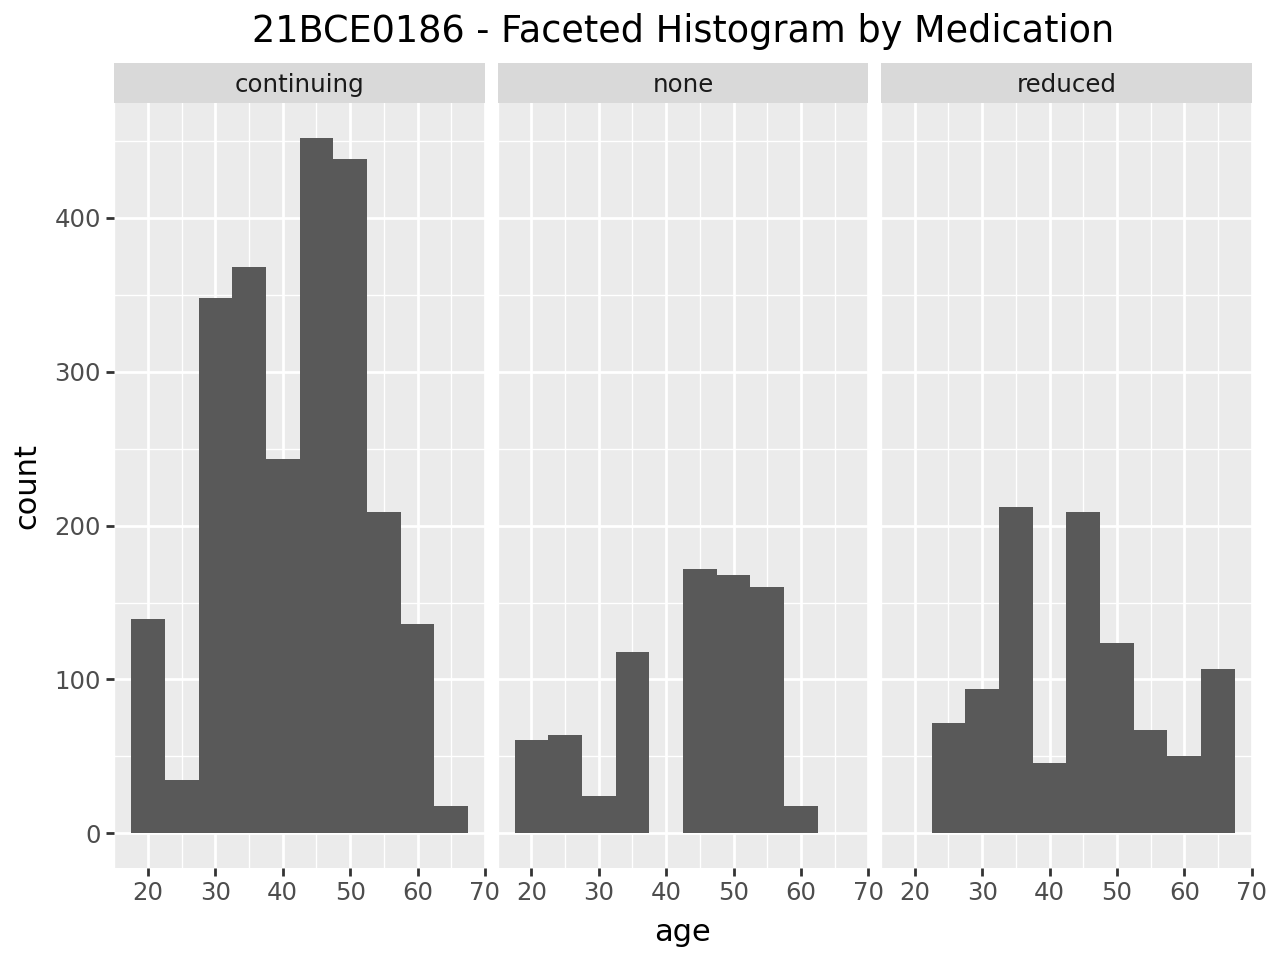

In [ ]:
# Histogram with facet wrap
(ggplot(data, aes(x='age'))
 + geom_histogram(binwidth=5)
 + facet_wrap('~medication')
 + ggtitle('21BCE0186 - Faceted Histogram by Medication'))


In [ ]:
# Arithmetic mean
mean_age = data['age'].mean()
print("Arithmetic Mean of Age:", mean_age)

# Geometric mean using scipy
from scipy.stats import gmean
geometric_mean_age = gmean(data['age'])
print("Geometric Mean of Age:", geometric_mean_age)

# Harmonic mean using scipy
from scipy.stats import hmean
harmonic_mean_age = hmean(data['age'])
print("Harmonic Mean of Age:", harmonic_mean_age)


Arithmetic Mean of Age: 42.363921001926784
Geometric Mean of Age: 40.72481981764944
Harmonic Mean of Age: 38.91241335878429


In [ ]:
# Median
median_age = data['age'].median()
print("Median of Age:", median_age)

# Quantile (25th, 50th, 75th percentiles)
quantiles_age = data['age'].quantile([0.25, 0.5, 0.75])
print("Quantiles of Age:\n", quantiles_age)

# Deciles (10th, 20th,..., 90th percentiles)
deciles_age = data['age'].quantile([i/10 for i in range(1, 10)])
print("Deciles of Age:\n", deciles_age)

# Percentiles
percentiles_age = data['age'].quantile([i/100 for i in range(1, 101)])
print("Percentiles of Age:\n", percentiles_age)


Median of Age: 44.0
Quantiles of Age:
 0.25    33.0
0.50    44.0
0.75    50.0
Name: age, dtype: float64
Deciles of Age:
 0.1    28.0
0.2    32.0
0.3    35.0
0.4    40.0
0.5    44.0
0.6    46.0
0.7    49.0
0.8    52.0
0.9    56.0
Name: age, dtype: float64
Percentiles of Age:
 0.01    18.00
0.02    20.00
0.03    21.00
0.04    21.00
0.05    23.00
        ...  
0.96    62.00
0.97    62.47
0.98    63.00
0.99    66.00
1.00    66.00
Name: age, Length: 100, dtype: float64


In [ ]:
# Range
range_age = data['age'].max() - data['age'].min()
print("Range of Age:", range_age)


Range of Age: 48


In [ ]:
# IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) of Age:", IQR)


Interquartile Range (IQR) of Age: 17.0


In [ ]:
# Standard deviation
std_dev_age = data['age'].std()
print("Standard Deviation of Age:", std_dev_age)

# Variance
variance_age = data['age'].var()
print("Variance of Age:", variance_age)


Standard Deviation of Age: 11.201243987490118
Variance of Age: 125.4678668672835


In [ ]:
# Skewness
skewness_age = data['age'].skew()
print("Skewness of Age:", skewness_age)

# Kurtosis
kurtosis_age = data['age'].kurtosis()
print("Kurtosis of Age:", kurtosis_age)


Skewness of Age: -0.15249418284553157
Kurtosis of Age: -0.6894465877701017


In [ ]:
# Frequency distribution of the 'age' column
freq_dist = data['age'].value_counts().sort_index()
print("Frequency Distribution of Age:\n", freq_dist)


Frequency Distribution of Age:
 age
18     75
20     28
21     97
23     12
24     87
26     23
27     49
28    147
29     84
30    121
32    114
33    274
34     80
35    180
36    130
37     34
38     19
39     46
40     76
41     61
42     87
43    172
44    104
45    189
46    312
47     56
48     87
49    185
50    203
51     72
52    183
53    172
54     88
55     63
56     58
57     55
58     18
59     20
60     83
62     83
63     78
66     47
Name: count, dtype: int64


In [ ]:
# Relative frequency distribution
relative_freq_dist = data['age'].value_counts(normalize=True).sort_index()
print("Relative Frequency Distribution of Age:\n", relative_freq_dist)


Relative Frequency Distribution of Age:
 age
18    0.018064
20    0.006744
21    0.023362
23    0.002890
24    0.020954
26    0.005539
27    0.011802
28    0.035405
29    0.020231
30    0.029143
32    0.027457
33    0.065992
34    0.019268
35    0.043353
36    0.031310
37    0.008189
38    0.004576
39    0.011079
40    0.018304
41    0.014692
42    0.020954
43    0.041426
44    0.025048
45    0.045520
46    0.075145
47    0.013487
48    0.020954
49    0.044557
50    0.048892
51    0.017341
52    0.044075
53    0.041426
54    0.021195
55    0.015173
56    0.013969
57    0.013247
58    0.004335
59    0.004817
60    0.019990
62    0.019990
63    0.018786
66    0.011320
Name: proportion, dtype: float64


Cumulative Frequency Distribution of Age:
 age
18      75
20     103
21     200
23     212
24     299
26     322
27     371
28     518
29     602
30     723
32     837
33    1111
34    1191
35    1371
36    1501
37    1535
38    1554
39    1600
40    1676
41    1737
42    1824
43    1996
44    2100
45    2289
46    2601
47    2657
48    2744
49    2929
50    3132
51    3204
52    3387
53    3559
54    3647
55    3710
56    3768
57    3823
58    3841
59    3861
60    3944
62    4027
63    4105
66    4152
Name: count, dtype: int64


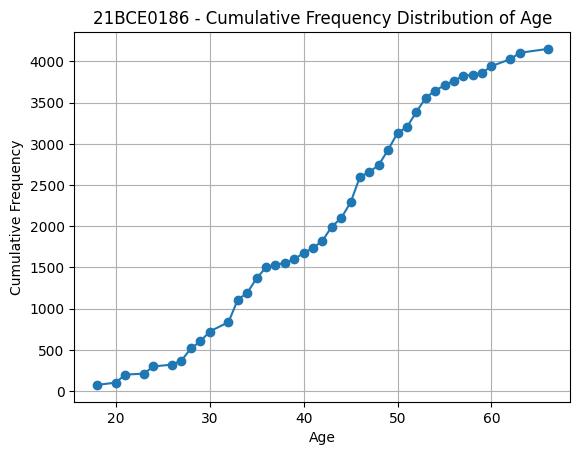

In [ ]:
# Cumulative frequency distribution
cumulative_freq = freq_dist.cumsum()
print("Cumulative Frequency Distribution of Age:\n", cumulative_freq)

# Plot cumulative frequency distribution
plt.plot(cumulative_freq, marker='o')
plt.title('21BCE0186 - Cumulative Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()


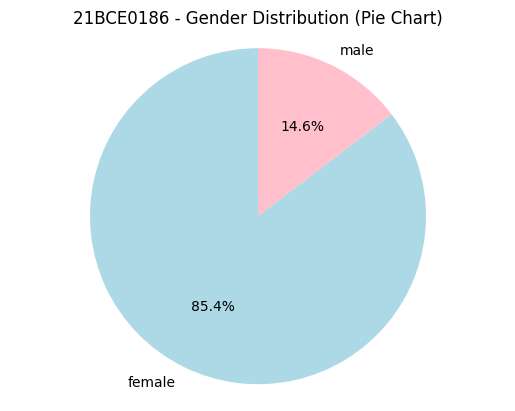

In [ ]:
# Pie chart for the 'sex' column
sex_counts = data['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('21BCE0186 - Gender Distribution (Pie Chart)')
plt.axis('equal')
plt.show()


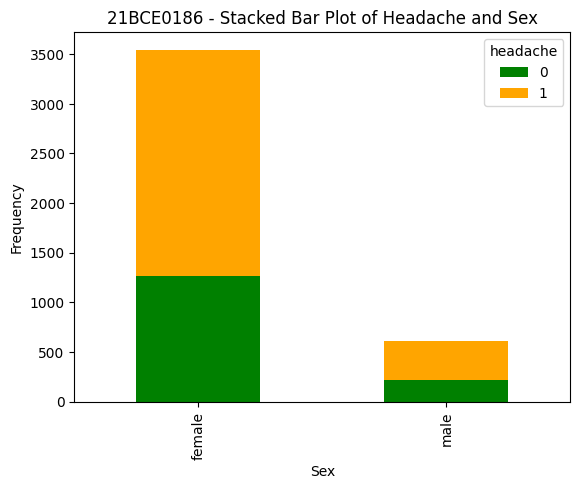

In [ ]:
# Stacked bar plot for 'headache' and 'sex'
headache_sex_cross = pd.crosstab(data['sex'], data['headache'])
headache_sex_cross.plot(kind='bar', stacked=True, color=['green', 'orange'])
plt.title('21BCE0186 - Stacked Bar Plot of Headache and Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#2d analysis
# Contingency table for 'headache' and 'sex'
contingency_table = pd.crosstab(data['sex'], data['headache'])
print("Contingency Table:\n", contingency_table)

# Row profile (Proportions across rows)
row_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("Row Profile:\n", row_profile)


Contingency Table:
 headache     0     1
sex                 
female    1266  2279
male       220   387
Row Profile:
 headache         0         1
sex                         
female    0.357123  0.642877
male      0.362438  0.637562


In [ ]:
# Column profile (Proportions across columns)
column_profile = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("Column Profile:\n", column_profile)


Column Profile:
 headache         0         1
sex                         
female    0.851952  0.854839
male      0.148048  0.145161


In [ ]:
# Relative frequency
relative_frequency = contingency_table / contingency_table.sum().sum()
print("Relative Frequency Table:\n", relative_frequency)


Relative Frequency Table:
 headache         0         1
sex                         
female    0.304913  0.548892
male      0.052987  0.093208


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)


Chi-square Statistic: 0.042688484136431136
P-value: 0.8363129528687885
Degrees of Freedom: 1
Expected Frequencies:
 [[1268.75481696 2276.24518304]
 [ 217.24518304  389.75481696]]


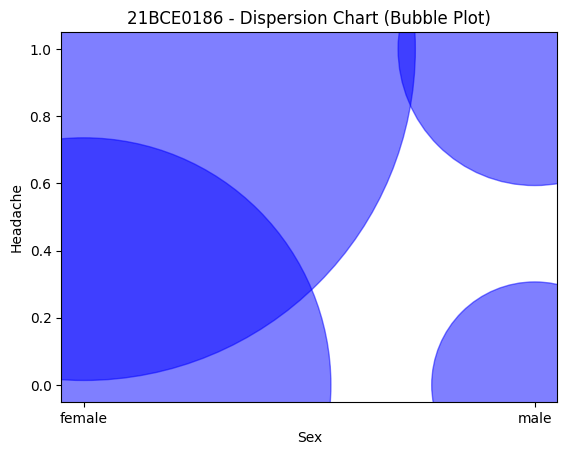

In [ ]:
# Create a meshgrid of x and y coordinates based on the index and columns
x = np.repeat(contingency_table.index, len(contingency_table.columns))
y = np.tile(contingency_table.columns, len(contingency_table.index))

# Flatten the contingency table values and multiply for bubble sizes
bubble_sizes = contingency_table.values.flatten() * 100

# Now create the bubble plot
plt.scatter(x, y, s=bubble_sizes, color='blue', alpha=0.5)
plt.title('21BCE0186 - Dispersion Chart (Bubble Plot)')
plt.xlabel('Sex')
plt.ylabel('Headache')
plt.show()


In [ ]:
import plotly.express as px

# Sun-ray plot for the contingency table
fig = px.sunburst(data_frame=data, path=['sex', 'headache'], title='21BCE0186 - Sun-Ray Plot')
fig.show()


In [ ]:
# Independence ratios (observed/expected frequencies)
independence_ratios = contingency_table / expected
print("Independence Ratios Data Set:\n", independence_ratios)
# X² contributions (observed - expected)² / expected
chi_square_contributions = (contingency_table - expected) ** 2 / expected
print("Chi-Square Contributions Data Set:\n", chi_square_contributions)


In [ ]:
#3D analysis
# Calculate statistical characteristics for numeric columns
statistical_characteristics = data.describe()
print("Statistical Characteristics:\n", statistical_characteristics)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D Stereogram: 'age', 'airq', and 'time'
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D (age vs. airq vs. time)
ax.scatter(data['age'], data['airq'], data['time'], c='b', marker='o')
ax.set_title('21BCE0186 - 3D Stereogram')
ax.set_xlabel('Age')
ax.set_ylabel('Air Quality')
ax.set_zlabel('Time')
plt.show()


In [ ]:
# Dispersion box plot for 'age', 'airq', and 'time'
plt.figure(figsize=(10, 6))
data[['age', 'airq', 'time']].plot(kind='box')
plt.title('21BCE0186 - Dispersion Box Plot')
plt.ylabel('Value')
plt.show()


In [ ]:
import plotly.express as px

# Sun-ray plot for statistical characteristics
stat_char_df = data[['age', 'airq', 'time']].describe().reset_index()
fig = px.sunburst(stat_char_df, path=['index'], values='age', title='21BCE0186 - Sun Ray Plot for Age')
fig.show()

# Similarly, you can create sunburst plots for 'airq' and 'time'.
fig = px.sunburst(stat_char_df, path=['index'], values='airq', title='21BCE0186 - Sun Ray Plot for Air Quality')
fig.show()

fig = px.sunburst(stat_char_df, path=['index'], values='time', title='21BCE0186 - Sun Ray Plot for Time')
fig.show()


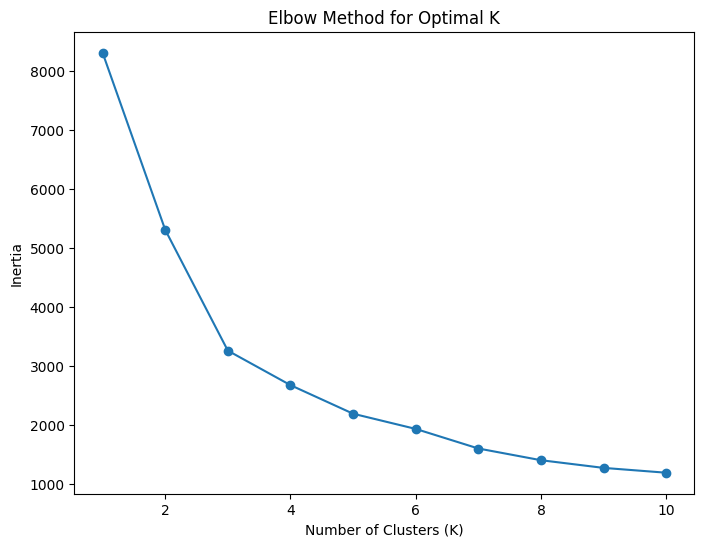

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant numerical features for clustering
X = data[['age', 'airq']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters for K-Means
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method result
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

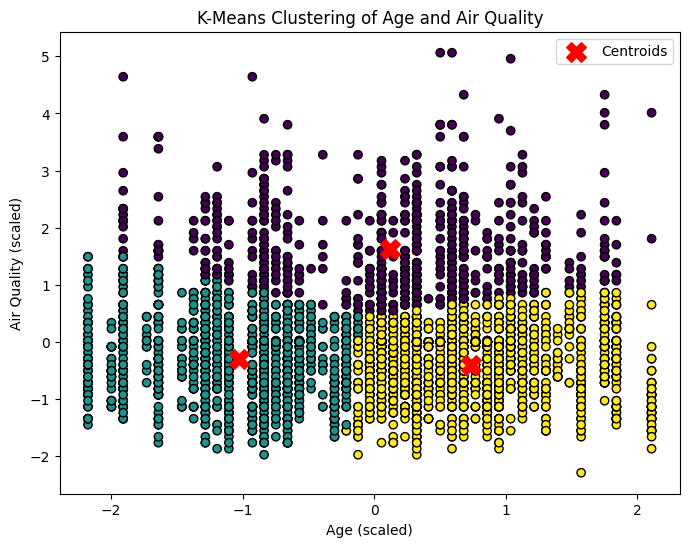

In [58]:
# Fit K-Means with the optimal number of clusters (replace 3 with your optimal K)
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_labels'] = kmeans.fit_predict(X_scaled)
# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['kmeans_labels'], cmap='viridis', marker='o', edgecolor='k')

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Age (scaled)')
plt.ylabel('Air Quality (scaled)')
plt.title('K-Means Clustering of Age and Air Quality')
plt.legend()
plt.show()


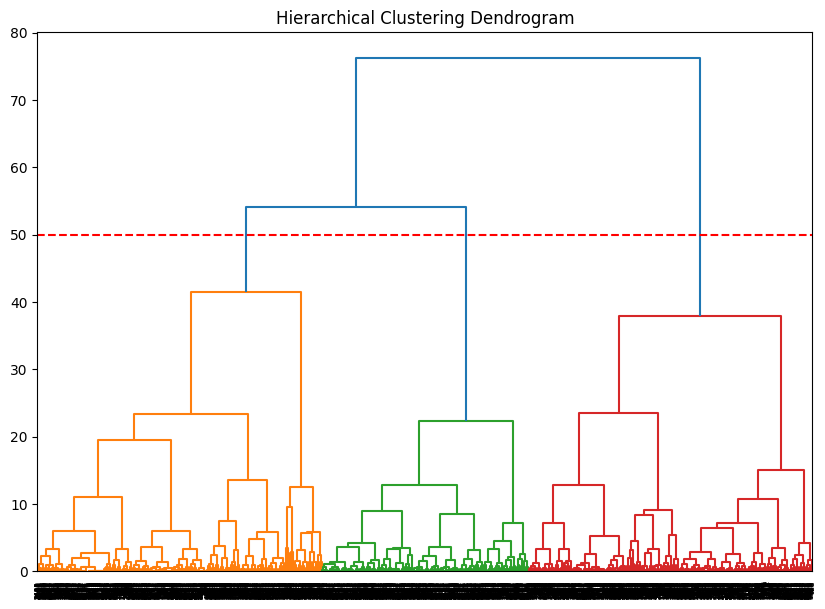

In [63]:
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

# Draw a line to show the cut-off for optimal clusters
plt.axhline(y=50, color='r', linestyle='--')  # Adjust 'y' for the desired cut-off
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


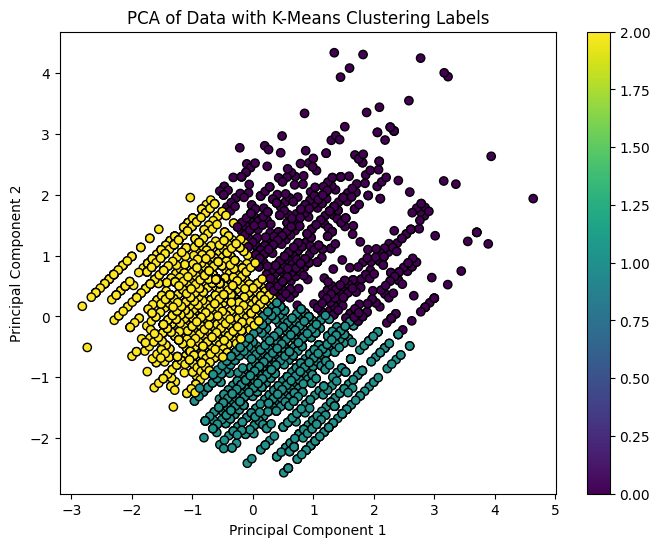

In [64]:
# Import necessary libraries for PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data points in the reduced PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['kmeans_labels'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data with K-Means Clustering Labels')
plt.colorbar()  # Add colorbar to indicate cluster assignments
plt.show()


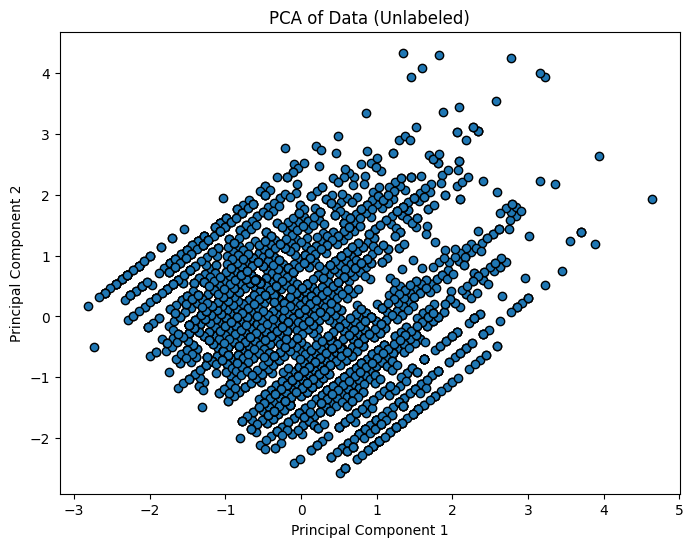

In [62]:
# If you haven't applied clustering yet, you can visualize the PCA without cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data (Unlabeled)')
plt.show()
